# Árbol de decision para clasificación

Un árbol de decisión es un modelo que representa el patrón de los datos en forma estructural; lo cuál facilita su análisis para entender fenómenos en la variable target del problema.

In [1]:
#Carga de bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Cargar dataset

Utilizaremos el dataset de prueba iris, utilizaremos la clase $load\_iris$ de scikit-learn

In [2]:
#cargamos el dataframe
iris = load_iris()

#iris['target']
iris

features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Categorical.from_codes(iris.target, iris.target_names)

## Preparar datos de prueba y entrenamiento

El set de datos lo podemos dividir en dos subconjuntos, uno para pruebas y el otro para entrenar nuestro modelo.  La clase $train\_test\_split$

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 0)

In [5]:
print("# de instancias de entrenamiento: "+str(len(x_train)))
print("# de instancias de prueba: "+str(len(x_test)))
print("# de instancias totales: "+str(len(iris.data)))

# de instancias de entrenamiento: 105
# de instancias de prueba: 45
# de instancias totales: 150


## Entrenar el modelo

In [6]:
# Create Decision Tree classifier object
#dt = DecisionTreeClassifier()

dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
dt = dt.fit(x_train,y_train)

#Predict the response for test dataset
pred_test = dt.predict(x_test)

pred_test

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

## Evaluación del modelo

In [7]:
#verficar la pecisión del modelo
accuracy_score(y_test, pred_test)

0.9777777777777777

In [8]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#determinar la importancia de las variables (feature)
importances = pd.DataFrame({'Característica':x_train.columns,'Importancia':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('Importancia',ascending=False)

importances

In [10]:
#Matriz de confusión
cm = confusion_matrix(y_test, pred_test)

print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


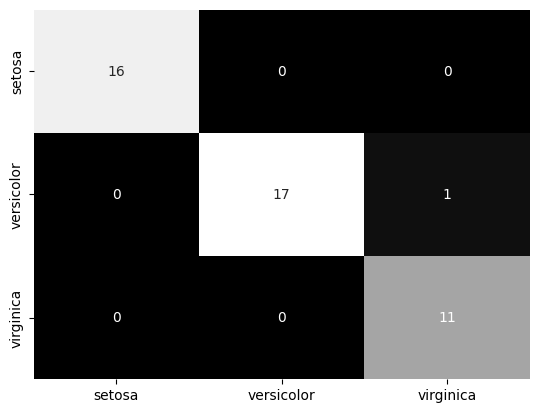

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, annot=True, cbar=False, cmap="gray")
# Establecer etiquetas en los ejes x e y
plt.xticks(np.arange(len(iris.target_names)) + 0.5, iris.target_names)
plt.yticks(np.arange(len(iris.target_names)) + 0.5, iris.target_names)

plt.show()

## Visualización

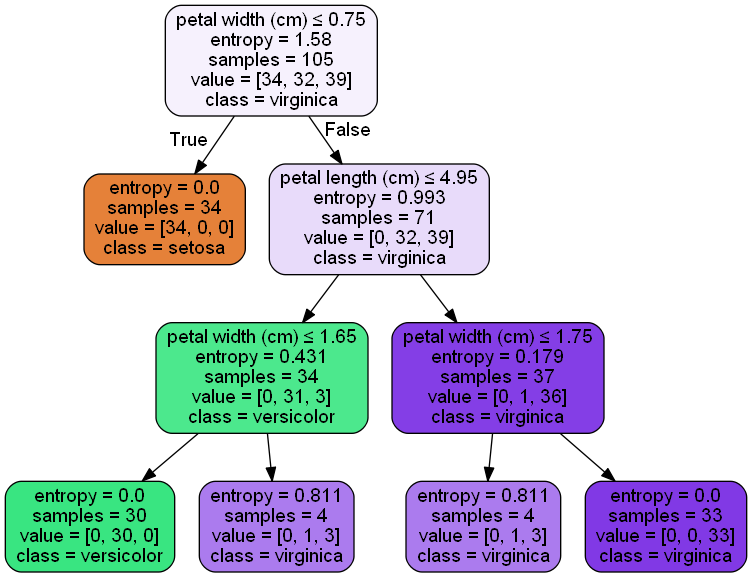

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = iris.feature_names,
                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arbol-iris.png')
Image(graph.create_png())